In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
matplotlib.rcParams["figure.figsize"] = (10,5)
%matplotlib inline

In [7]:
df = pd.read_csv(r"Diwali Sales Data.csv", encoding = "unicode-escape")

In [8]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [9]:
df.shape

(11251, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
# Checking for null values

df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [12]:
df.drop(["Status","unnamed1"], axis = 1, inplace = True)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [14]:
# Treating the missing values

df["Amount"] = df["Amount"].fillna(df["Amount"].mean())

<Axes: >

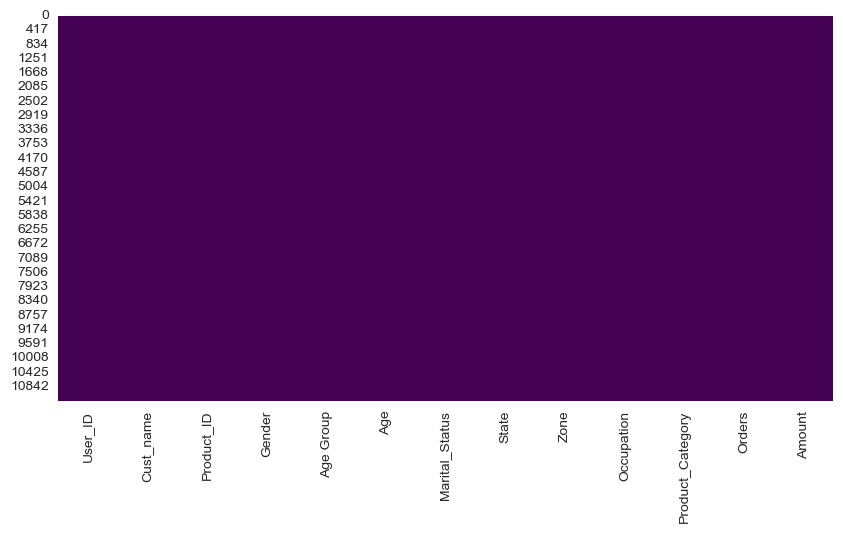

In [15]:
sns.heatmap(df.isnull(), cmap = "viridis", cbar = False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [17]:
# Number of male and female in the database

def gender(x):
    if x == "M":
        return "Male"
    else:
        return "Female"

In [18]:
df["Sex"] = df["Gender"].apply(gender)

In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Sex
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Female
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Female
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Female
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Male
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Male


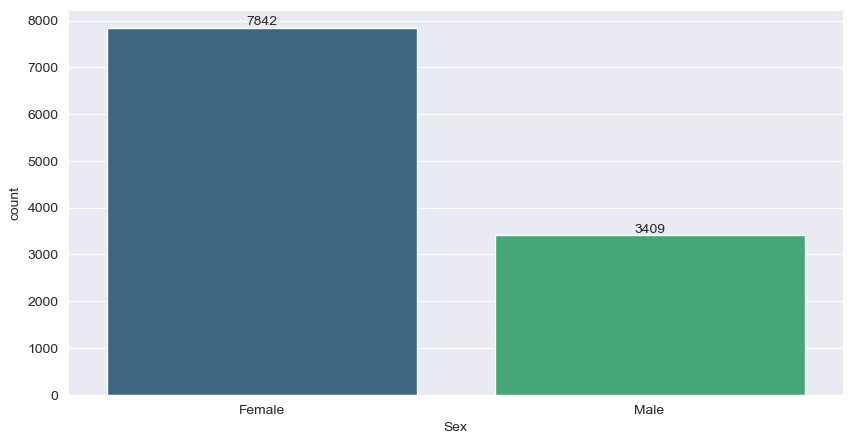

In [20]:
ax = sns.countplot(x = "Sex", data = df, palette = "viridis")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Count'>

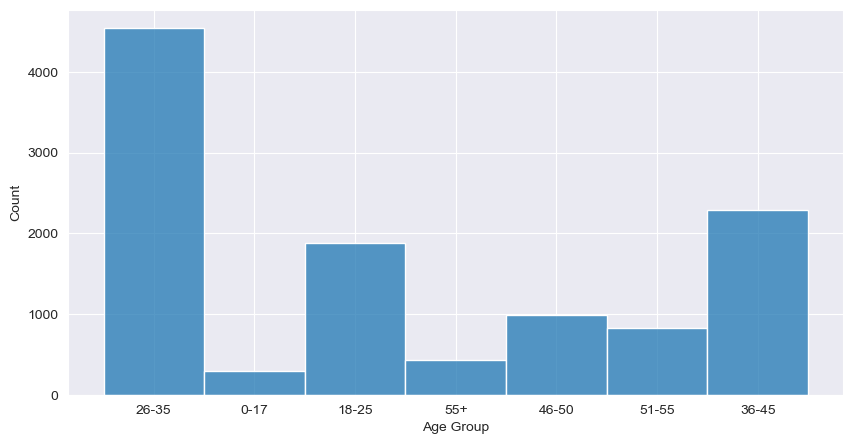

In [24]:
# Distribution of age in the dataset

sns.histplot(df["Age Group"])

Text(0.5, 1.0, 'Count of occupation')

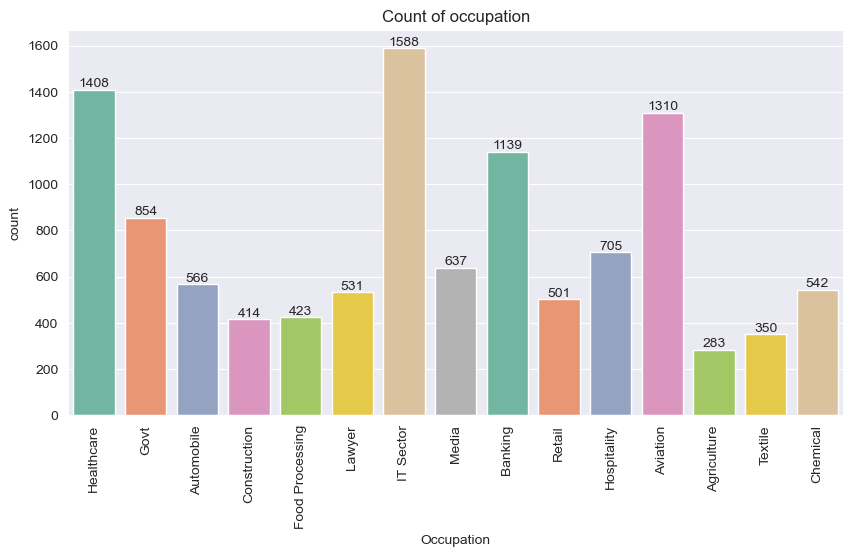

In [30]:
# Occupation count 

ax = sns.countplot(x = "Occupation", data = df, palette = "Set2")

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation = 90)

plt.title("Count of occupation")

Text(0.5, 1.0, 'Gender-wise occupation count')

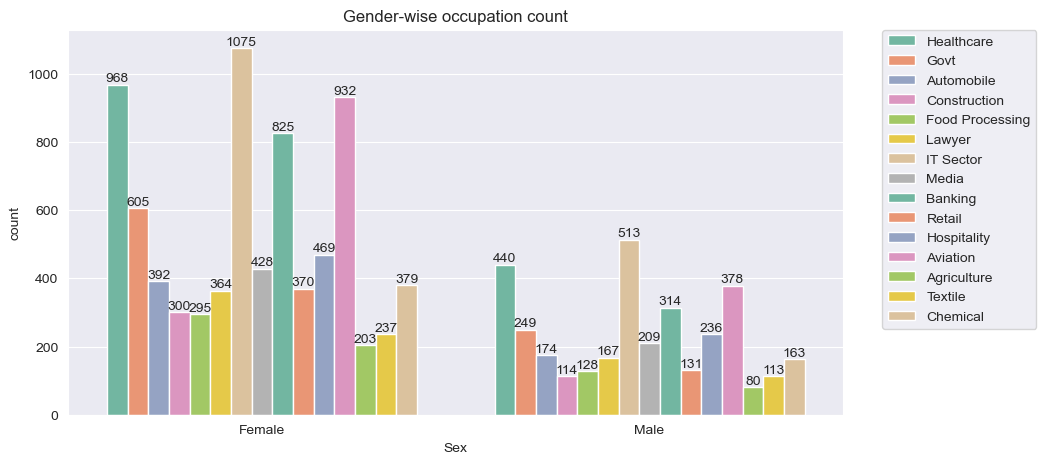

In [33]:
# Gender-wise occupation count

ax = sns.countplot(x = "Sex", data = df, hue = "Occupation", palette = "Set2")

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Gender-wise occupation count")

In [34]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Sex
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Female
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Female
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Female
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Male
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Male


In [36]:
# Is there any relation between age and amount spent

c = df[["Age","Amount"]].corr()

<Axes: >

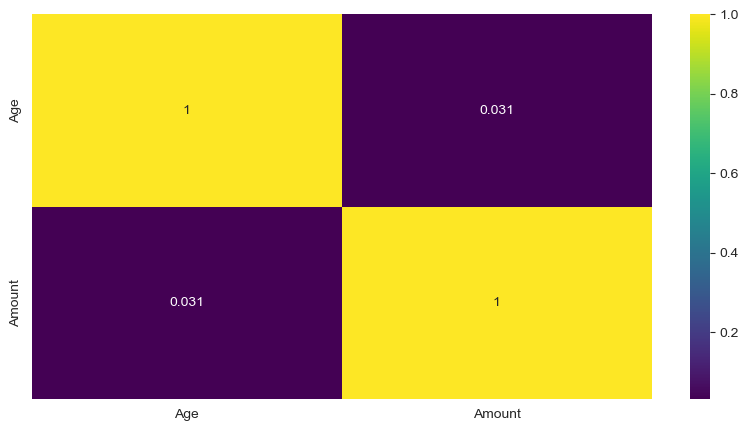

In [40]:
sns.heatmap(c, cmap = "viridis", annot = True)

<Axes: xlabel='State'>

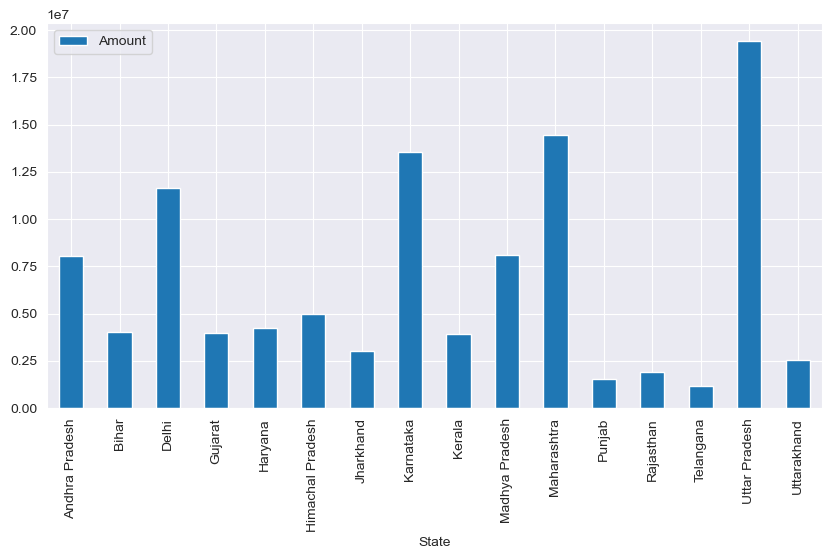

In [50]:
# State-wise total sales

df.pivot_table(index = "State", values = "Amount", aggfunc= "sum").plot(kind = "bar")

In [58]:
# Product category-wise total sales

category = df.groupby("Product_Category")["Amount"].sum()

Text(0.5, 1.0, 'Product category-wise total sales')

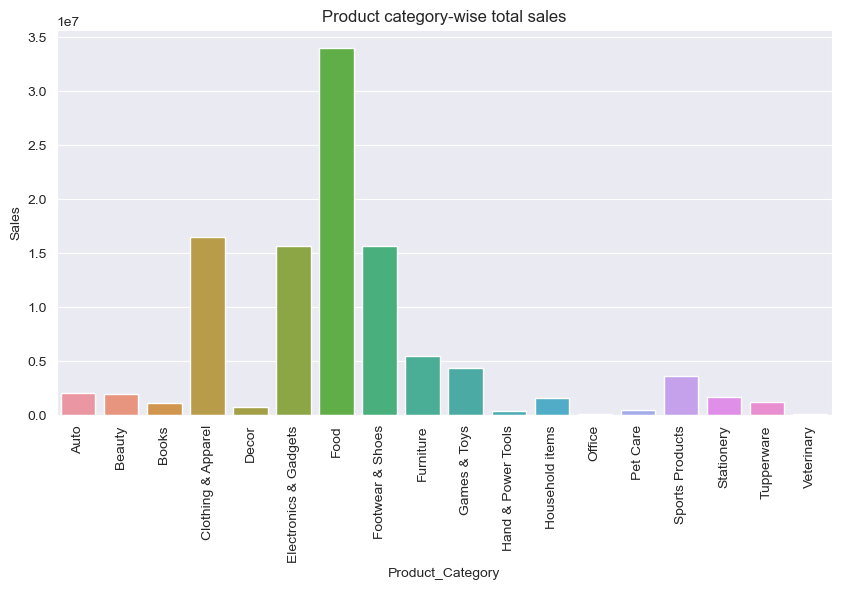

In [64]:
sns.barplot(x = category.index,y = category.values)

plt.xticks(rotation = 90)

plt.ylabel("Sales")

plt.title("Product category-wise total sales")

In [65]:
# Proportion of married to single

def status(x):
    if x == 0:
        return "Single"
    else:
        return "Married"

In [66]:
df["Status"] = df["Marital_Status"].apply(status)

In [67]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Sex,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Female,Single
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Female,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Female,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Male,Single
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Male,Married


In [68]:
status = df["Status"].value_counts()

In [69]:
status

Status
Single     6522
Married    4729
Name: count, dtype: int64

Text(0.5, 1.0, 'Married vs single')

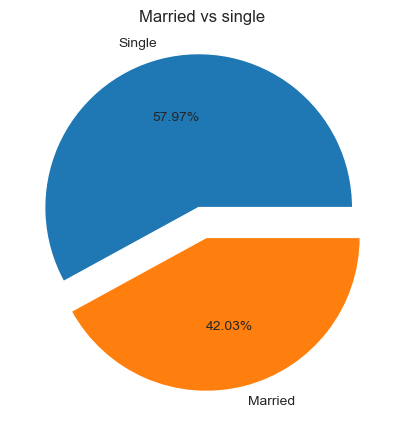

In [73]:
plt.pie(status, labels = status.index, autopct="%.2f%%", explode = [0.1,0.1])

plt.title("Married vs single")

Text(0, 0.5, 'Sales Amount')

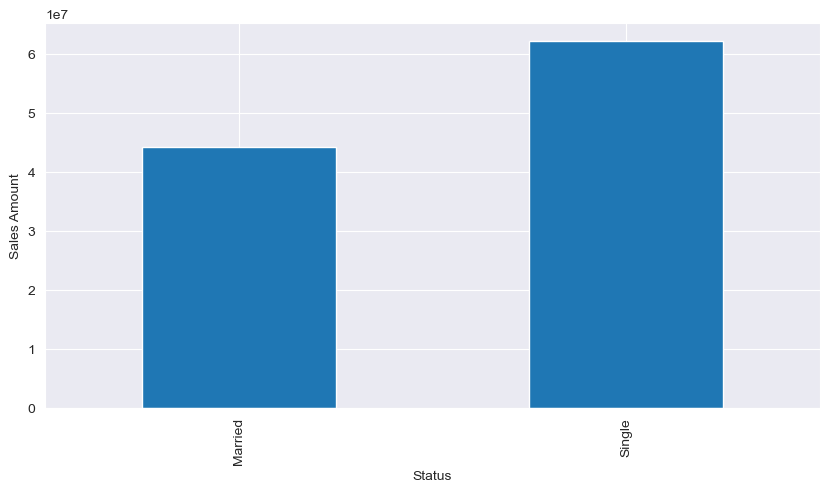

In [79]:
# Does MArital staus effect buying habbits

df.groupby("Status")["Amount"].sum().plot(kind = "bar")

plt.ylabel("Sales Amount")

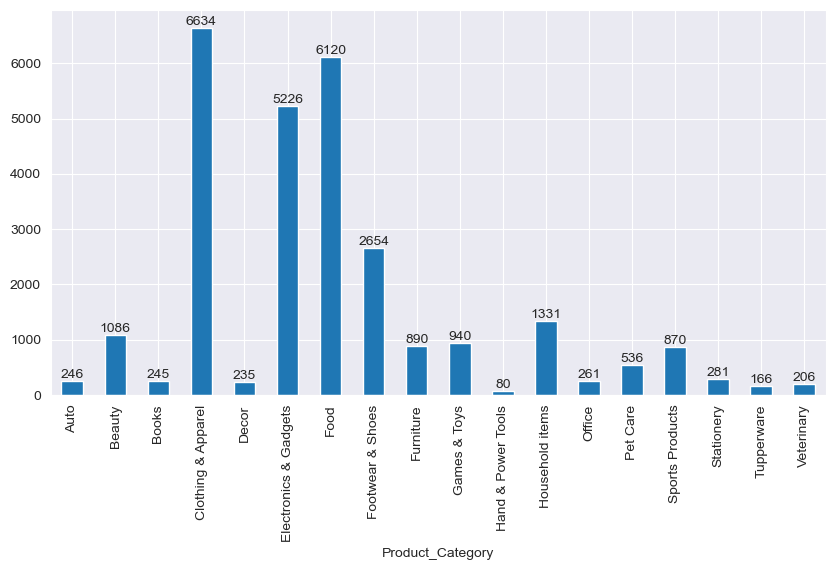

In [82]:
# Product category-wise total orders

ax = df.groupby("Product_Category")["Orders"].sum().plot(kind = "bar")

for bars in ax.containers:
    ax.bar_label(bars)